In [1]:
import pandas as pd
import numpy as np

In [2]:
dfrh = pd.read_csv("./songs/feats.rh",header=None )

In [3]:
dfrp = pd.read_csv("./songs/feats.rp",header=None )

In [4]:
dfssd = pd.read_csv("./songs/feats.ssd",header=None )

In [5]:
dfssd.as_matrix()[:,1:].shape

(40, 168)

In [6]:
X = np.hstack([np.hstack([dfrh.as_matrix()[:,1:], dfrp.as_matrix()[:,1:]]),dfssd.as_matrix()[:,1:]])

In [7]:
X.shape

(40, 1668)

In [8]:
%matplotlib inline

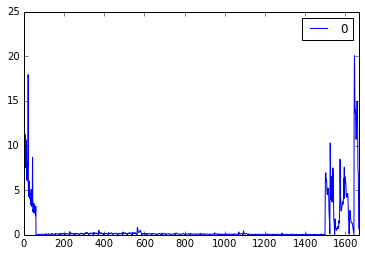

In [9]:
pd.DataFrame(X[0]).plot()

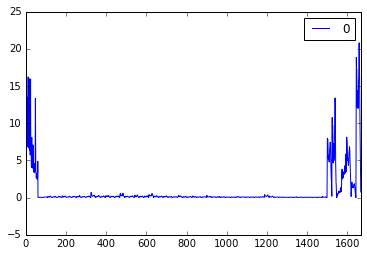

In [10]:
pd.DataFrame(X[1]).plot()

In [11]:
from sklearn.decomposition import PCA
p = PCA(n_components=10)

In [12]:
X2 = p.fit_transform(X)

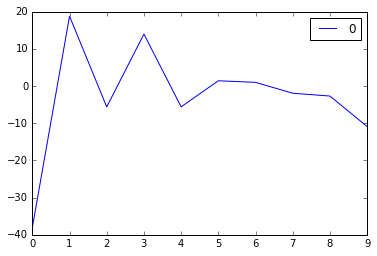

In [13]:
pd.DataFrame(X2[4]).plot()

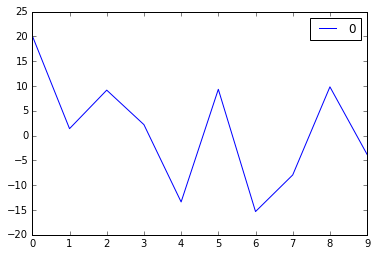

In [15]:
pd.DataFrame(X2[17]).plot()

In [15]:
from scipy.spatial.distance import pdist, squareform
pdist(X, 'euclidean')

array([ 35.63356064,  23.29059084,  25.54686756,  53.23709554,
        31.8190825 ,  31.21965444,  33.37044102,  24.16917994,
        33.26018147,  33.37449136,  26.85220618,  28.64726566,
        26.59438564,  28.6550603 ,  33.79027763,  38.34077867,
        41.62171598,  37.31809219,  32.92867791,  38.63971752,
        47.84666895,  21.80638553,  28.37760903,  30.50776707,
        29.73710001,  24.6012261 ,  31.70200816,  23.98818214,
        29.27648094,  35.0423008 ,  27.10896394,  24.89325677,
        50.31363036,  33.44882502,  25.1564648 ,  37.85903666,
        29.27726608,  33.69868938,  29.06878889,  32.61830831,
        33.32137942,  60.47041852,  36.49425956,  43.03243268,
        34.47914439,  32.06082676,  45.97664581,  35.53744927,
        39.60817199,  37.23212755,  29.86958354,  30.34777408,
        32.05665386,  38.221239  ,  41.33327886,  55.84916826,
        35.11996229,  40.88162185,  62.31548039,  33.45561188,
        32.49325403,  38.91148686,  29.38380918,  34.38

In [16]:
import numpy as np
%load_ext autoreload
%autoreload 2


In [17]:
cd ..

/Users/mehdi/Dropbox/working folder/PHd/phd-clustering-models


In [18]:
from tools.viz_bench_tools_2 import *
from K_estim_pi_pen_EM import GraphLassoMix


In [20]:
alg = GraphLassoMix(lambda_param=1, n_iter=20, max_clusters=20)
res = alg.fit(X2)

-----------------------------------------
Param Lambda = 1
Max clusters:  20
Nombre d'iterations FISTA:  447
Algo Iteration:  0
Algo Iteration:  1
Algo Iteration:  2
Algo Iteration:  3
Algo Iteration:  4
Algo Iteration:  5
Algo Iteration:  6
Algo Iteration:  7
Algo Iteration:  8
Algo Iteration:  9
Algo Iteration:  10
Algo Iteration:  11
Algo Iteration:  12
Algo Iteration:  13
Algo Iteration:  14
Algo Iteration:  15
Algo Iteration:  16
Algo Iteration:  17
Algo Iteration:  18
Algo Iteration:  19
Pi estim for lambda= 1  :  [0.13312731232330985, 0.10665473314547839, 0.13580118143457215, 0.13329445932829578, 0.10674113977028531, 0.15988071433106005, 0.053359559573833454, 0.10661266023810909, 0.064528239855056069]


In [21]:
l = pd.DataFrame(dfrh[0])
l["grp"] = res[1].argmax(axis = 1)
l

,0,grp
0,01.CharliePuth-MarvinGaye(Feat.MeghanTrainor).mp3,7
1,02.CalvinHarris+Disciples-HowDeepIsYourLove.mp3,0
2,03.TheWeeknd-Can'tFeelMyFace.mp3,3
3,04.LittleMix-BlackMagic.mp3,7
4,05.LostFrequencies-AreYouWithMe.mp3,1
5,06.Sigma-Glitterball(Feat.EllaHenderson).mp3,5
6,07.Years&Years-Shine.mp3,8
7,08.WALKTHEMOON-ShutUpandDance.mp3,4
8,09.OneDirection-DragMeDown.mp3,3
9,10.OMI-Cheerleader(FelixJaehnRemix).mp3,2
